In [1]:
# Import thư viện pandas để làm việc với dữ liệu dạng bảng (DataFrame)
import pandas as pd

# Đường dẫn đến tệp dữ liệu CSV cần tải
# Đây là nơi chứa tệp dữ liệu 'data_pttk.csv' trong hệ thống máy tính
file_path = 'D:/Intelligent System/DATA/data_pttk.csv'

# Đọc tệp CSV từ đường dẫn được chỉ định và lưu dữ liệu dưới dạng DataFrame vào biến 'data'
data = pd.read_csv(file_path)

# Hiển thị 5 dòng đầu tiên của dữ liệu để kiểm tra nhanh cấu trúc và nội dung của DataFrame
# Điều này giúp bạn xác nhận dữ liệu đã được tải đúng cách
# .head() hiển thị nội dung, còn .info() cung cấp thông tin chi tiết về dữ liệu
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MaSV    160 non-null    object 
 1   10%     160 non-null    float64
 2   20%     160 non-null    float64
 3   20%_1   160 non-null    float64
 4   Thi     160 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.4+ KB


(  MaSV   10%  20%  20%_1   Thi
 0   b1   9.0  7.0    6.0  6.00
 1   b2   9.0  7.0    6.0  6.00
 2   b3  10.0  9.0    7.0  7.25
 3   b4   9.0  7.0    6.0  6.00
 4   b5  10.0  8.0    7.0  7.50,
 None)

In [3]:
# Import thư viện pandas để xử lý dữ liệu dạng bảng (DataFrame)
import pandas as pd

# Import thư viện numpy để hỗ trợ xử lý dữ liệu số và tạo số ngẫu nhiên
import numpy as np

# Định nghĩa các giá trị thập phân có thể được sử dụng (các giá trị phần lẻ: 0.0, 0.25, 0.5, 0.75)
possible_values = [0.0, 0.25, 0.5, 0.75]

# Tính số lượng dòng bổ sung cần thêm vào DataFrame để đạt 1.000 dòng
additional_records = 1000 - data.shape[0]  # 'data.shape[0]' trả về số dòng hiện tại

# Tạo ngẫu nhiên các điểm số với giá trị phần lẻ .0, .25, .5, .75
new_data_revised = pd.DataFrame({
    'MaSV': [f'r{i}' for i in range(1, additional_records + 1)],  # Tạo ID mới duy nhất cho mỗi dòng
    '10%': np.random.choice(possible_values, additional_records) + np.random.randint(5, 11, additional_records),
    '20%': np.random.choice(possible_values, additional_records) + np.random.randint(5, 11, additional_records),
    '20%_1': np.random.choice(possible_values, additional_records) + np.random.randint(5, 11, additional_records),
    'Thi': np.random.choice(possible_values, additional_records) + np.random.randint(5, 11, additional_records)
})

# Kết hợp dữ liệu gốc với dữ liệu mới tạo
# 'ignore_index=True' đảm bảo rằng chỉ số của DataFrame mới sẽ được tự động đánh lại
augmented_data_revised = pd.concat([data, new_data_revised], ignore_index=True)

# Hiển thị 5 dòng đầu tiên và thông tin chi tiết về dữ liệu mới sau khi bổ sung
augmented_data_revised.head(), augmented_data_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MaSV    1000 non-null   object 
 1   10%     1000 non-null   float64
 2   20%     1000 non-null   float64
 3   20%_1   1000 non-null   float64
 4   Thi     1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


(  MaSV   10%  20%  20%_1   Thi
 0   b1   9.0  7.0    6.0  6.00
 1   b2   9.0  7.0    6.0  6.00
 2   b3  10.0  9.0    7.0  7.25
 3   b4   9.0  7.0    6.0  6.00
 4   b5  10.0  8.0    7.0  7.50,
 None)

In [5]:
augmented_data_revised.to_csv('D:/Intelligent System/DATA/data_pttk_dl.csv', index=False, encoding='utf-8')

BẮT ĐẦU CODE

Linear Regression - MAE:  1.5369262494329112
Linear Regression - RMSE:  1.7926114049080706
Logistic Regression - MAE:  1.345
Logistic Regression - RMSE:  1.7190113437671084


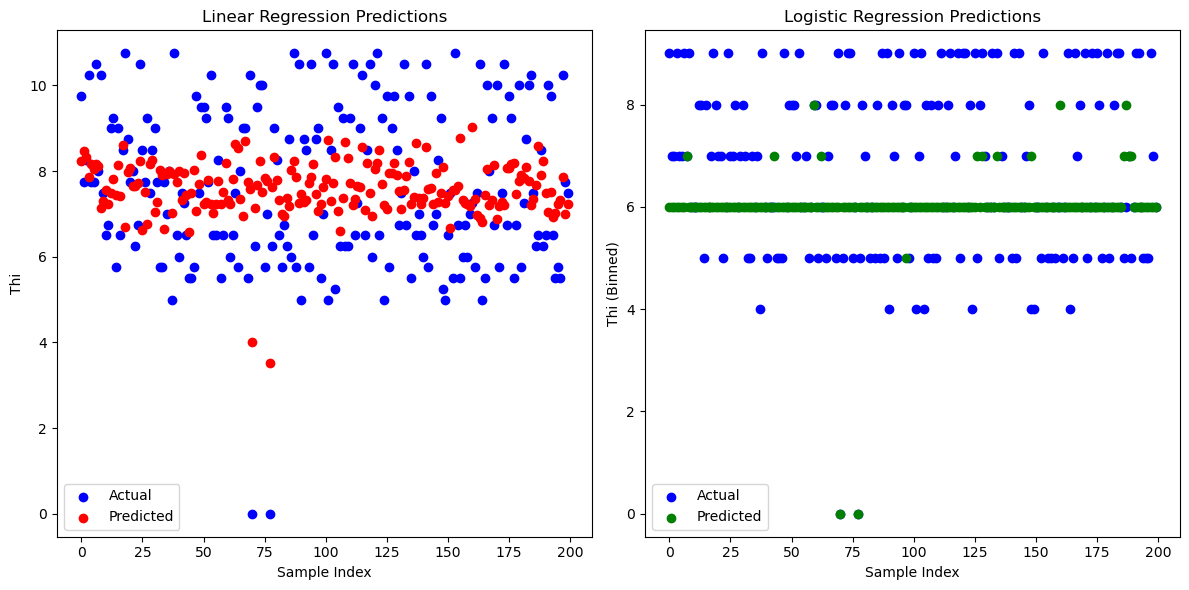

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

# Load the dataset
file_path = 'D:/Intelligent System/DATA/data_pttk_dl.csv'
data = pd.read_csv(file_path)

# Extract features and target variable
X = data[['10%', '20%', '20%_1']]
y = data['Thi']

# Discretize 'Thi' for Logistic Regression
# Use KBinsDiscretizer to convert continuous values into integer bins
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Logistic Regression model (for binned target values)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train_binned)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluation metrics for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Evaluation metrics for Logistic Regression (discrete values)
mae_logistic = mean_absolute_error(y_test_binned, y_pred_logistic)
rmse_logistic = np.sqrt(mean_squared_error(y_test_binned, y_pred_logistic))

# Print the results
print("Linear Regression - MAE: ", mae_linear)
print("Linear Regression - RMSE: ", rmse_linear)
print("Logistic Regression - MAE: ", mae_logistic)
print("Logistic Regression - RMSE: ", rmse_logistic)

# Plot the predictions
plt.figure(figsize=(12, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred_linear, color='red', label='Predicted')
plt.title('Linear Regression Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Thi')
plt.legend()

# Plot for Logistic Regression
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test_binned)), y_test_binned, color='blue', label='Actual')
plt.scatter(range(len(y_test_binned)), y_pred_logistic, color='green', label='Predicted')
plt.title('Logistic Regression Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Thi (Binned)')
plt.legend()

plt.tight_layout()
plt.show()


Linear Regression - MAE: 1.536926248073578, RMSE: 1.7926113927538292
Logistic Regression - MAE: 1.345, RMSE: 1.7190113437671084
CNN - MAE: 7.463122465610504, RMSE: 9.063515887620692
RNN - MAE: 1.5999475413560866, RMSE: 1.879170167018664


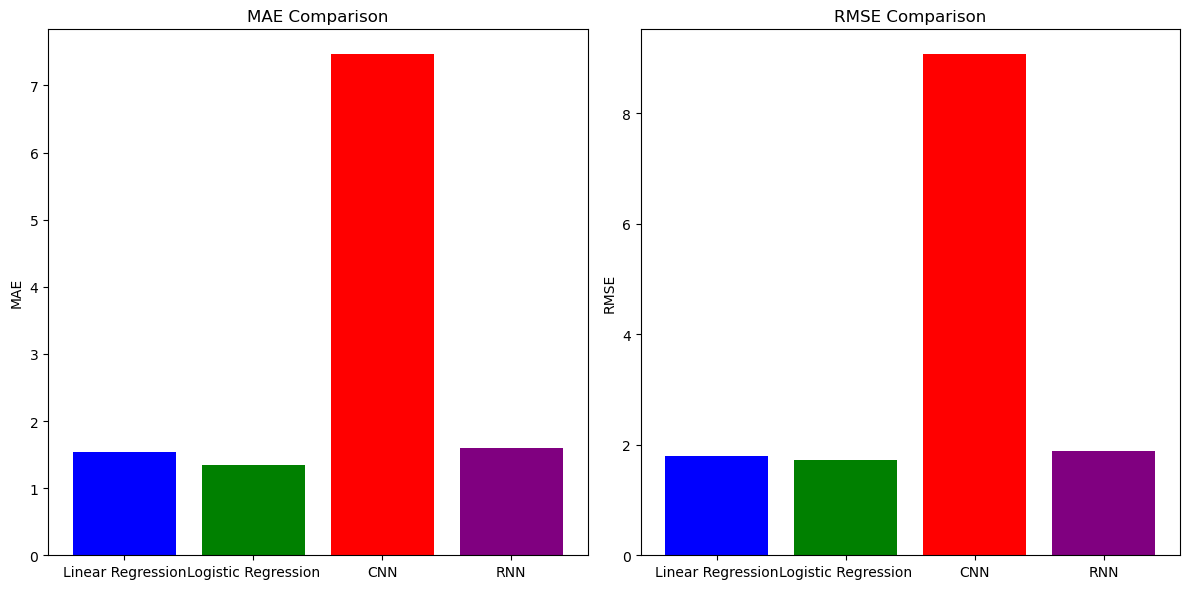

In [11]:
# Import thư viện pandas để xử lý dữ liệu dạng bảng
import pandas as pd

# Import thư viện numpy để hỗ trợ các thao tác số học
import numpy as np

# Import matplotlib.pyplot để vẽ đồ thị
import matplotlib.pyplot as plt

# Import các module để tách dữ liệu và xây dựng mô hình
from sklearn.model_selection import train_test_split  # Dùng để chia tập dữ liệu thành training và testing
from sklearn.linear_model import LinearRegression, LogisticRegression  # Mô hình hồi quy tuyến tính và hồi quy logistic
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Tính toán các chỉ số đánh giá mô hình
from sklearn.preprocessing import StandardScaler  # Chuẩn hóa dữ liệu
from sklearn.preprocessing import KBinsDiscretizer  # Rời rạc hóa giá trị liên tục

# Đọc dữ liệu từ file CSV
file_path = 'D:/Intelligent System/DATA/data_pttk_dl.csv'
data = pd.read_csv(file_path)  # Tải dữ liệu vào DataFrame

# Lấy các cột đặc trưng (features) và biến mục tiêu (target)
X = data[['10%', '20%', '20%_1']]  # Các đặc trưng đầu vào
y = data['Thi']  # Biến mục tiêu cần dự đoán

# Rời rạc hóa biến mục tiêu 'Thi' để sử dụng với Logistic Regression
# Sử dụng KBinsDiscretizer để chia giá trị liên tục thành các khoảng (bins)
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).astype(int).ravel()  
# Chuyển đổi 'Thi' thành giá trị nguyên tương ứng với các khoảng (bins)

# Chia tập dữ liệu thành tập huấn luyện (training) và kiểm tra (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
# Với biến liên tục (hồi quy tuyến tính)
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_split(X, y_binned, test_size=0.2, random_state=42)  
# Với biến rời rạc (hồi quy logistic)

# Chuẩn hóa các đặc trưng để cải thiện hiệu suất mô hình
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chuẩn hóa tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Áp dụng chuẩn hóa cho tập kiểm tra

# Xây dựng mô hình hồi quy tuyến tính
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)  # Huấn luyện mô hình
y_pred_linear = linear_model.predict(X_test_scaled)  # Dự đoán trên tập kiểm tra

# Xây dựng mô hình hồi quy logistic (với mục tiêu rời rạc)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train_binned)  # Huấn luyện mô hình
y_pred_logistic = logistic_model.predict(X_test_scaled)  # Dự đoán trên tập kiểm tra

# Đánh giá hiệu suất mô hình hồi quy tuyến tính
mae_linear = mean_absolute_error(y_test, y_pred_linear)  # Sai số trung bình tuyệt đối
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))  # Sai số bình phương trung bình (căn bậc 2)

# Đánh giá hiệu suất mô hình hồi quy logistic (với giá trị rời rạc)
mae_logistic = mean_absolute_error(y_test_binned, y_pred_logistic)
rmse_logistic = np.sqrt(mean_squared_error(y_test_binned, y_pred_logistic))

# In kết quả đánh giá mô hình
print("Linear Regression - MAE: ", mae_linear)
print("Linear Regression - RMSE: ", rmse_linear)
print("Logistic Regression - MAE: ", mae_logistic)
print("Logistic Regression - RMSE: ", rmse_logistic)

# Vẽ đồ thị dự đoán
plt.figure(figsize=(12, 6))

# Đồ thị cho hồi quy tuyến tính
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Thực tế')  # Dữ liệu thực tế
plt.scatter(range(len(y_test)), y_pred_linear, color='red', label='Dự đoán')  # Dữ liệu dự đoán
plt.title('Dự đoán hồi quy tuyến tính')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Thi')
plt.legend()

# Đồ thị cho hồi quy logistic
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test_binned)), y_test_binned, color='blue', label='Thực tế')  # Dữ liệu thực tế
plt.scatter(range(len(y_test_binned)), y_pred_logistic, color='green', label='Dự đoán')  # Dữ liệu dự đoán
plt.title('Dự đoán hồi quy logistic')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Thi (rời rạc)')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\84395\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


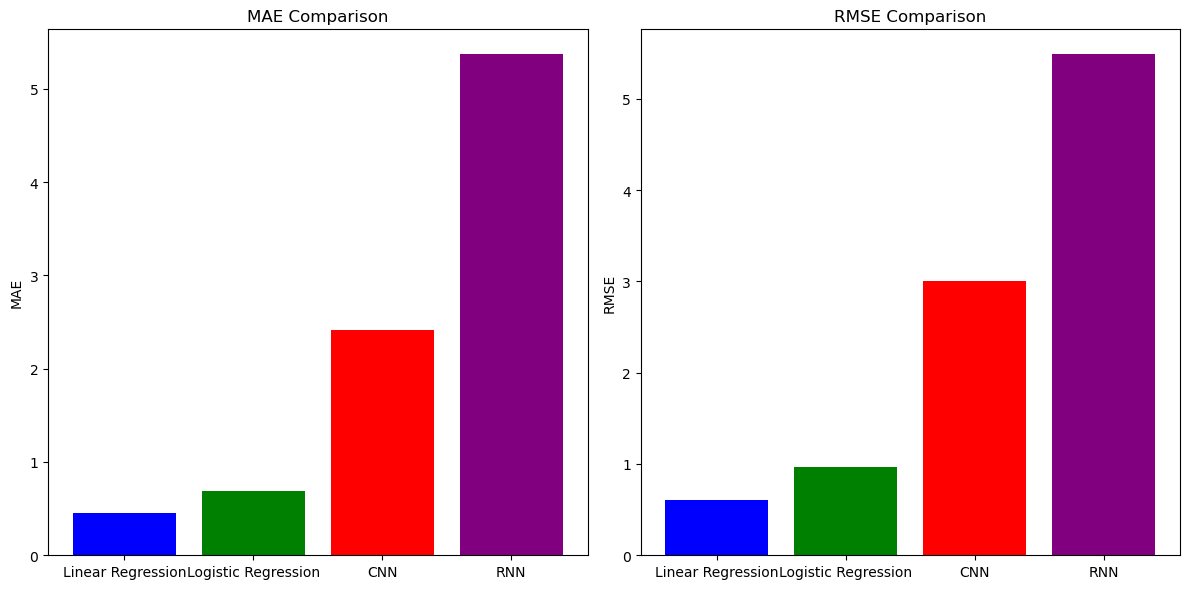

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import tensorflow as tf
import tkinter as tk
from tkinter import ttk, messagebox

# Load the dataset
file_path = 'C:/Users/84395/Desktop/Phát triển hệ thống thông minh/data_pttk.csv'

data = pd.read_csv(file_path)

# Extract features and target variable
X = data[['10%', '20%', '20%_1']].values
y = data['Thi'].values

# Discretize 'Thi' for Logistic Regression
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
y_binned = discretizer.fit_transform(y.reshape(-1, 1)).astype(int).ravel()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).astype(np.float32)
X_test_scaled = scaler.transform(X_test).astype(np.float32)

### Linear Regression ###
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

### Logistic Regression ###
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train_binned)
y_pred_logistic = logistic_model.predict(X_test_scaled)

### CNN Model ###
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

cnn_model = tf.Module()
cnn_model.conv1 = tf.Variable(tf.random.normal([2, 1, 32], dtype=tf.float32))
cnn_model.dense1 = tf.Variable(tf.random.normal([96, 1], dtype=tf.float32))

@tf.function
def cnn_forward(x):
    conv_out = tf.nn.conv1d(x, cnn_model.conv1, stride=1, padding='SAME')
    conv_out = tf.nn.relu(conv_out)
    flat_out = tf.reshape(conv_out, [-1, 96])
    return tf.matmul(flat_out, cnn_model.dense1)

optimizer = tf.optimizers.Adam()

for epoch in range(500):
    with tf.GradientTape() as tape:
        predictions = cnn_forward(X_train_cnn)
        loss = tf.reduce_mean(tf.square(predictions - y_train.reshape(-1, 1).astype(np.float32)))
    grads = tape.gradient(loss, cnn_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

y_pred_cnn = cnn_forward(X_test_cnn).numpy().ravel()

### RNN Model ###
X_train_rnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_rnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

rnn_model = tf.Module()
rnn_model.rnn_cell = tf.keras.layers.SimpleRNNCell(32)
rnn_model.dense1 = tf.Variable(tf.random.normal([32, 1], dtype=tf.float32))

@tf.function
def rnn_forward(x):
    batch_size = tf.shape(x)[0]
    state = tf.zeros([batch_size, rnn_model.rnn_cell.units], dtype=tf.float32)
    for t in range(x.shape[1]):
        state, _ = rnn_model.rnn_cell(x[:, t, :], [state])
    return tf.matmul(state, rnn_model.dense1)

optimizer_rnn = tf.optimizers.Adam()

for epoch in range(500):
    with tf.GradientTape() as tape:
        predictions_rnn = rnn_forward(X_train_rnn)
        loss_rnn = tf.reduce_mean(tf.square(predictions_rnn - y_train.reshape(-1, 1).astype(np.float32)))
    grads_rnn = tape.gradient(loss_rnn, rnn_model.trainable_variables)
    optimizer_rnn.apply_gradients(zip(grads_rnn, rnn_model.trainable_variables))

y_pred_rnn = rnn_forward(X_test_rnn).numpy().ravel()

### GUI Setup ###
def display_results():
    try:
        value1 = float(entry_10.get())
        value2 = float(entry_20.get())
        value3 = float(entry_20_1.get())
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values.")
        return

    input_data = scaler.transform([[value1, value2, value3]])

    # Chọn mô hình dự đoán dựa vào người dùng
    selected_model = model_var.get()
    if selected_model == "Linear Regression":
        y_pred = linear_model.predict(input_data)
    elif selected_model == "Logistic Regression":
        y_pred = logistic_model.predict(input_data)
    elif selected_model == "CNN":
        # Chuyển đổi input_data thành kiểu float32 và định hình lại cho CNN
        input_data_cnn = input_data.reshape(-1, 3, 1).astype(np.float32)
        y_pred = cnn_forward(input_data_cnn).numpy().ravel()
    elif selected_model == "RNN":
        # Chuyển đổi input_data thành kiểu float32 và định hình lại cho RNN
        input_data_rnn = input_data.reshape(-1, 3, 1).astype(np.float32)
        y_pred = rnn_forward(input_data_rnn).numpy().ravel()
    else:
        messagebox.showerror("Model Selection Error", "Please select a model.")
        return

    # Hiển thị kết quả dự đoán
    messagebox.showinfo("Prediction Result", f"Predicted 'Thi': {y_pred[0]:.2f}")

def plot_comparison():
    models = ['Linear Regression', 'Logistic Regression', 'CNN', 'RNN']
    
    mae_scores = [mean_absolute_error(y_test, y_pred_linear),
                  mean_absolute_error(y_test_binned, y_pred_logistic),
                  mean_absolute_error(y_test, y_pred_cnn),
                  mean_absolute_error(y_test, y_pred_rnn)]

    rmse_scores = [np.sqrt(mean_squared_error(y_test, y_pred_linear)),
                   np.sqrt(mean_squared_error(y_test_binned, y_pred_logistic)),
                   np.sqrt(mean_squared_error(y_test, y_pred_cnn)),
                   np.sqrt(mean_squared_error(y_test, y_pred_rnn))]

    plt.figure(figsize=(12, 6))

    # MAE Comparison
    plt.subplot(1, 2, 1)
    plt.bar(models, mae_scores, color=['blue', 'green', 'red', 'purple'])
    plt.title('MAE Comparison')
    plt.ylabel('MAE')

    # RMSE Comparison
    plt.subplot(1, 2, 2)
    plt.bar(models, rmse_scores, color=['blue', 'green', 'red', 'purple'])
    plt.title('RMSE Comparison')
    plt.ylabel('RMSE')

    plt.tight_layout()
    plt.show()

# Main window
root = tk.Tk()
root.title("Machine Learning Prediction")

# Input fields
tk.Label(root, text="10%:").grid(row=0, column=0)
entry_10 = tk.Entry(root)
entry_10.grid(row=0, column=1)

tk.Label(root, text="20%:").grid(row=1, column=0)
entry_20 = tk.Entry(root)
entry_20.grid(row=1, column=1)

tk.Label(root, text="20%_1:").grid(row=2, column=0)
entry_20_1 = tk.Entry(root)
entry_20_1.grid(row=2, column=1)

# Model selection
tk.Label(root, text="Select Model:").grid(row=3, column=0)
model_var = tk.StringVar(value="Linear Regression")
model_menu = ttk.Combobox(root, textvariable=model_var, values=["Linear Regression", "Logistic Regression", "CNN", "RNN"])
model_menu.grid(row=3, column=1)

# Buttons
btn_predict = tk.Button(root, text="Predict", command=display_results)
btn_predict.grid(row=4, column=0, columnspan=2)

btn_plot = tk.Button(root, text="Show Comparison Chart", command=plot_comparison)
btn_plot.grid(row=5, column=0, columnspan=2)

# Run the GUI
root.mainloop()